# Video Game Similarity Analysis

This notebook provides a similarity analysis for video games based on features such as genre, platform, rating, and global sales.

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Initial Cleaning

In [3]:
# Load the selected dataset
video_games_sales = pd.read_csv('Video Games Sales.csv')
video_games_sales = video_games_sales[['Game Title', 'Platform', 'Genre', 'Review', 'Global']].copy()
video_games_sales.columns = ['Title', 'Platform', 'Genre', 'Rating', 'Global_Sales']
video_games_sales.dropna(subset=['Title', 'Platform', 'Genre', 'Rating', 'Global_Sales'], inplace=True)
video_games_sales.head()
    

,Title,Platform,Genre,Rating,Global_Sales
0,Wii Sports,Wii,Sports,76.28,81.12
1,Super Mario Bros.,NES,Platform,91.00,40.24
2,Mario Kart Wii,Wii,Racing,82.07,33.55
3,Wii Sports Resort,Wii,Sports,82.65,31.52
4,Tetris,GB,Puzzle,88.00,30.26


### Feature Engineering and Scaling

In [6]:
# One-hot encoding Genre and Platform, and scaling Rating and Global Sales
onehot_encoder = OneHotEncoder(sparse_output=False)
genres_encoded = onehot_encoder.fit_transform(video_games_sales[['Genre']])
platforms_encoded = onehot_encoder.fit_transform(video_games_sales[['Platform']])
scaler = StandardScaler()
rating_sales_scaled = scaler.fit_transform(video_games_sales[['Rating', 'Global_Sales']])
features = np.hstack((genres_encoded, platforms_encoded, rating_sales_scaled))
features[:5]  # Display sample of transformed features
    

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        , -0.25993475,
        22.07349582],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.     

### Similarity Calculation and Query Selection

In [7]:

# Selecting query games and calculating similarity
query_indices = [0, 1, 2]  # Indices for sample games (Wii Sports, Super Mario Bros., Mario Kart Wii)
cosine_sim = cosine_similarity(features[:, :-2], features[:, :-2])
euclidean_dist = euclidean_distances(features[:, -2:], features[:, -2:])
combined_similarity = 0.7 * cosine_sim - 0.3 * euclidean_dist
top_similar_games = {idx: combined_similarity[idx].argsort()[-11:-1][::-1] for idx in query_indices}
similar_games_titles = {video_games_sales.iloc[idx]['Title']: video_games_sales.iloc[top_similar_games[idx]]['Title'].tolist() for idx in query_indices}
similar_games_titles
    

{'Wii Sports': ['Super Mario Bros.',
  'Wii Sports Resort',
  'Mario Kart Wii',
  'Wii Play',
  'Wii Fit',
  'New Super Mario Bros. Wii',
  'Tetris',
  'Wii Fit Plus',
  'New Super Mario Bros.',
  'Duck Hunt'],
 'Super Mario Bros.': ['New Super Mario Bros.',
  'Mario Kart Wii',
  'Duck Hunt',
  'Wii Sports Resort',
  'New Super Mario Bros. Wii',
  'Tetris',
  'Super Mario Bros. 3',
  'Wii Play',
  'Super Mario World',
  'Nintendogs'],
 'Mario Kart Wii': ['Wii Sports Resort',
  'New Super Mario Bros. Wii',
  'Tetris',
  'Wii Play',
  'New Super Mario Bros.',
  'Duck Hunt',
  'Wii Fit',
  'Super Mario Bros.',
  'Mario Kart DS',
  'Wii Fit Plus']}

### Visualization of Top Similar Games

/var/folders/tv/13nwqtn90nj4zswmpspw54hr0000gn/T/ipykernel_15870/1997846516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=similar_titles, x=[combined_similarity[video_games_sales[video_games_sales['Title'] == query_title].index[0],


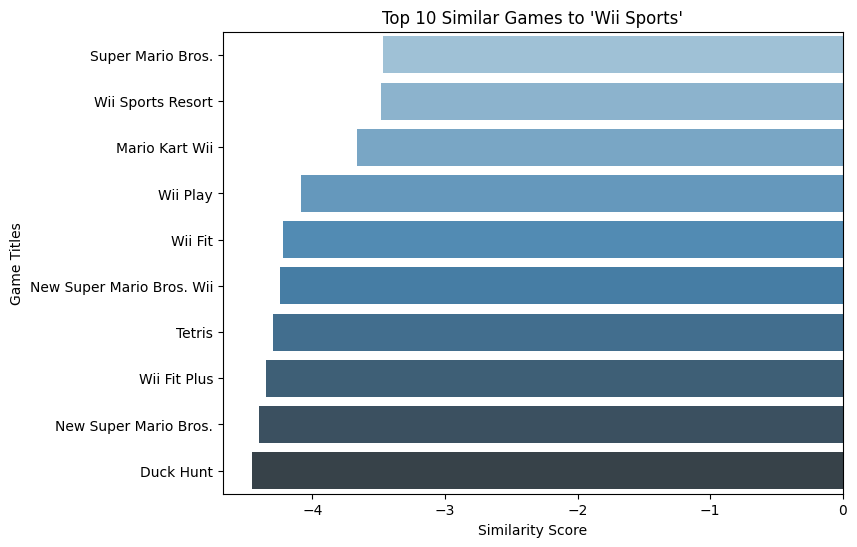

/var/folders/tv/13nwqtn90nj4zswmpspw54hr0000gn/T/ipykernel_15870/1997846516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=similar_titles, x=[combined_similarity[video_games_sales[video_games_sales['Title'] == query_title].index[0],


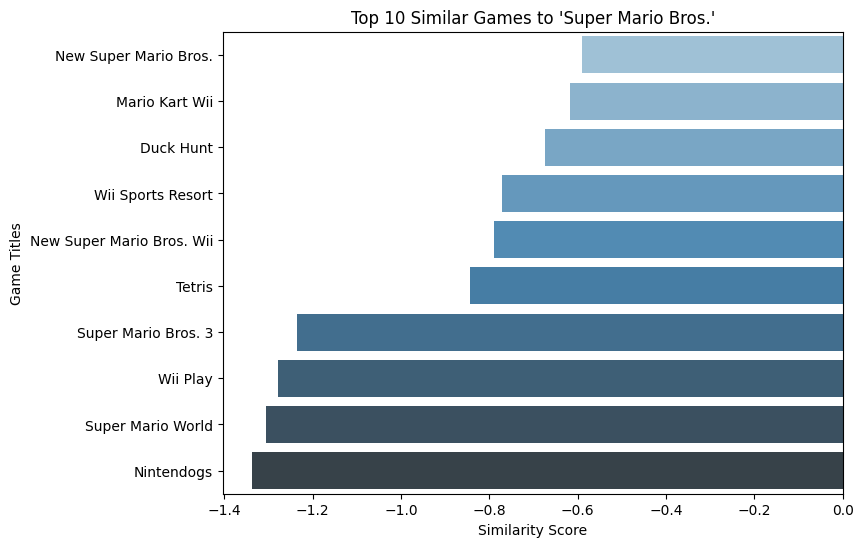

/var/folders/tv/13nwqtn90nj4zswmpspw54hr0000gn/T/ipykernel_15870/1997846516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=similar_titles, x=[combined_similarity[video_games_sales[video_games_sales['Title'] == query_title].index[0],


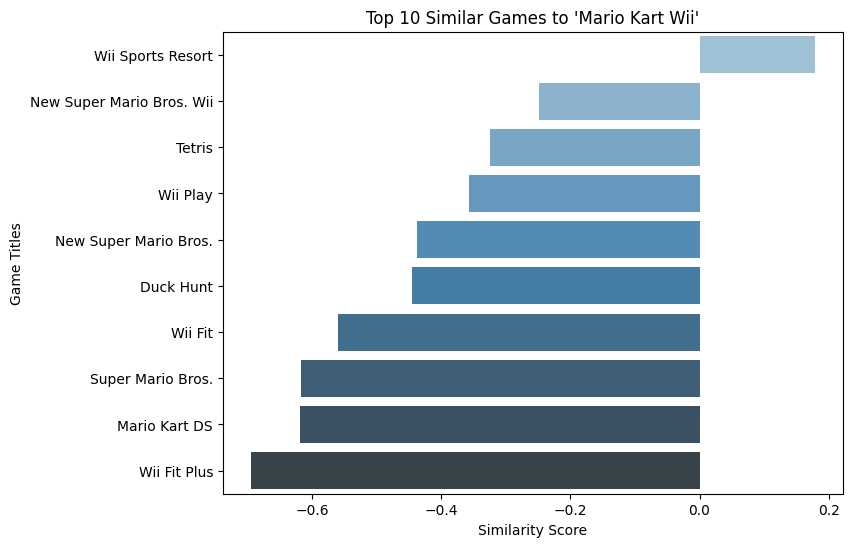

In [8]:

# Function to visualize top similar games for each query
def plot_similar_games(query_title, similar_titles):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(y=similar_titles, x=[combined_similarity[video_games_sales[video_games_sales['Title'] == query_title].index[0], 
                                      video_games_sales[video_games_sales['Title'] == title].index[0]] for title in similar_titles], 
                palette="Blues_d", ax=ax)
    ax.set_title(f"Top 10 Similar Games to '{query_title}'")
    ax.set_xlabel("Similarity Score")
    ax.set_ylabel("Game Titles")
    plt.show()

# Plot each query game's top similar games
for query_title, similar_titles in similar_games_titles.items():
    plot_similar_games(query_title, similar_titles)
    